In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

# Load data

In [2]:
# We load the database of students enrolled in 2019

df1 = pd.read_csv("Alumnos matrículados en básica secundaria y media según carácter y especialidad por jornada.csv",
                   delimiter=";")

# We load the database of students enrolled in 2022

df2 = pd.read_csv("Alumnos matriculados en básica secundaria y media según carácter y especialidad por jornada2.CSV",
                  encoding="ISO-8859-1")

# Concat both dataframes

In [3]:
# Now we concat the 2019 and 2022 dataframes with the help of pandas.concat function

df = pd.concat([df1, df2], ignore_index=True)

In [4]:
# Now we want to know the total number of students enrolled (men + women)

df['JORNESP_CANTIDAD_TOTAL'] = (df['JORNESP_CANTIDAD_HOMBRE'] +
                                (df['JORNESP_CANTIDAD_MUJER']))

# Now let's rename some of the column names: 

df = df.rename(columns={'PERIODO_ANIO': 'Año',
                        'GRADO_NOMBRE': 'Grado',
                        'JORNESP_CANTIDAD_HOMBRE': 'Masculino',
                        'JORNESP_CANTIDAD_MUJER': 'Femenino',
                        'JORNESP_CANTIDAD_TOTAL': 'Total'})

df

,SEDE_CODIGO,PERIODO_ID,Año,JORNADA_ID,JORNADA_CODIGO,JORNADA_NOMBRE,CARACTER_ID,CARACTER_CODIGO,CARACTER_NOMBRE,ESPECIALIDAD_ID,...,ESPECIALIDAD_NOMBRE,NIVELENSE_ID,NIVELENSE_CODIGO,NIVELENSE_NOMBRE,GRADO_ID,GRADO_CODIGO,Grado,Masculino,Femenino,Total
0,125269004271,6,2019,2,2,Mañana,1,1,Académico,17,...,Académico,4,4,Media,13,10,10.°,50,53,103
1,125269004271,6,2019,2,2,Mañana,1,1,Académico,17,...,Académico,3,3,Básica secundaria,11,8,8.°,58,80,138
2,125269004271,6,2019,2,2,Mañana,1,1,Académico,17,...,Académico,4,4,Media,14,11,11.°,41,56,97
3,125269004271,6,2019,2,2,Mañana,1,1,Académico,17,...,Académico,3,3,Básica secundaria,10,7,7.°,62,70,132
4,125269004271,6,2019,2,2,Mañana,1,1,Académico,17,...,Académico,3,3,Básica secundaria,12,9,9.°,63,54,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136165,376248000961,9,2022,2,2,Mañana,1,1,Académico,17,...,Académico,3,3,Básica secundaria,10,7,7.°,4,4,8
136166,376248000961,9,2022,2,2,Mañana,1,1,Académico,17,...,Académico,3,3,Básica secundaria,11,8,8.°,8,6,14
136167,376248000961,9,2022,2,2,Mañana,2,2,Técnico,12,...,Comercial,3,3,Básica secundaria,12,9,9.°,5,5,10
136168,376248000961,9,2022,2,2,Mañana,2,2,Técnico,12,...,Comercial,4,4,Media,13,10,10.°,5,2,7


# Pivot table 1

In [5]:
# Let's find out the total number of students enrolled by year and grade. Then we shape the data to the stacked format:

matricula = (df.pivot_table(index='Grado',
                            columns='Año',
                            aggfunc='sum',
                            values='Total')             
    .stack(future_stack=True)
    .reset_index()
    .rename(columns={0: "value"}))

matricula

,Grado,Año,value
0,10.°,2019,563868
1,10.°,2022,598809
2,11.°,2019,478190
3,11.°,2022,498972
4,12.°,2019,5055
5,12.°,2022,5669
6,13.°,2019,3904
7,13.°,2022,3909
8,6.°,2019,869480
9,6.°,2022,800961


## Graph 1

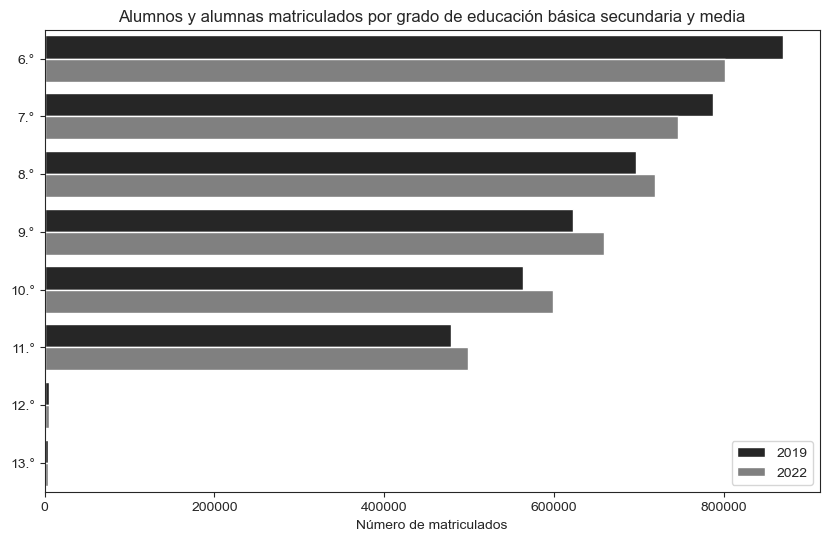

In [6]:
# Now we can graph a barplot:

sns.set_style('ticks')

plt.title('Alumnos y alumnas matriculados por grado de educación básica secundaria y media')

g1 = sns.barplot(data=matricula,
                 x='value',
                 y='Grado',
                 order=df['Grado'].value_counts().index,
                 hue='Año',
                 orient='h',
                 palette='dark:gray')

g1.set_xlabel('Número de matriculados')
g1.set_ylabel(None)

plt.legend(loc='lower right')

# plt.savefig('matriculados3.pdf', bbox_inches='tight')

# Pivot table 2

In [7]:
# Now we want to know the distribution of total number of students enrolled by year grade and sex. Then we shape the data to the stacked format:

matricula_cat = (df.pivot_table(index='Grado',
                                columns='Año',
                                aggfunc='sum',
                                values=['Masculino', 'Femenino'])             
    .stack(future_stack=True)
    .stack(future_stack=True)
    .reset_index()
    .rename(columns={0: "value", 'level_2': 'Género'}))

matricula_cat

,Grado,Año,Género,value
0,10.°,2019,Femenino,295135
1,10.°,2019,Masculino,268733
2,10.°,2022,Femenino,313052
3,10.°,2022,Masculino,285757
4,11.°,2019,Femenino,258041
...,...,...,...,...
27,8.°,2022,Masculino,361874
28,9.°,2019,Femenino,321489
29,9.°,2019,Masculino,300565
30,9.°,2022,Femenino,337581


## Graph 2

Text(34.19099999999999, 0.5, 'Número de matriculados')

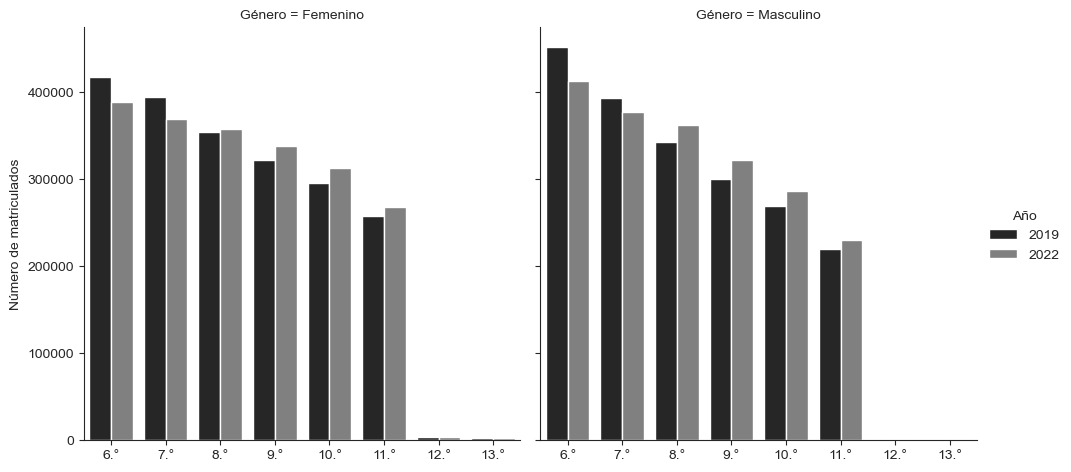

In [8]:
# Now we can graph a barplot:

sns.set_style('ticks')

g2 = sns.catplot(data=matricula_cat,
                 kind='bar',
                 x='Grado',
                 y='value',
                 order=df['Grado'].value_counts().index,
                 hue='Año',
                 col='Género',
                 palette='dark:gray')

g2.axes[0,0].set_xlabel(None)
g2.axes[0,1].set_xlabel(None)
g2.axes[0,0].set_ylabel('Número de matriculados')

# plt.savefig('matriculados4.pdf', bbox_inches='tight')

## Percentage change of students enrolled in priamary

In [9]:
# Here we calculate the percentage change of students in 6th and 7th grade:

secondary = (df.pivot_table(index=['Grado', 'Año'],
                            aggfunc='sum',
                            values='Total')
             .pct_change())

secondary

Total
Grado Año             
10.°  2019         NaN
      2022    0.061967
11.°  2019   -0.201432
      2022    0.043460
12.°  2019   -0.989869
      2022    0.121464
13.°  2019   -0.311342
      2022    0.001281
6.°   2019  221.430289
      2022   -0.078805
7.°   2019   -0.016415
      2022   -0.052957
8.°   2019   -0.066220
      2022    0.031928
9.°   2019   -0.134751
      2022    0.059752

In [10]:
# And here we compute the percentage change of students by gender in 6th and 7th grade:

secondary_gender = (df.pivot_table(index=['Grado', 'Año'],
                                   aggfunc='sum',
                                   values=['Masculino', 'Femenino'])                    
    .pct_change()                    
    .tail(10))

secondary_gender

Femenino   Masculino
Grado Año                         
13.°  2019   -0.253106   -0.464194
      2022   -0.022505    0.088305
6.°   2019  138.227227  494.850877
      2022   -0.068786   -0.088049
7.°   2019    0.016067   -0.047020
      2022   -0.066537   -0.039315
8.°   2019   -0.040664   -0.091165
      2022    0.009919    0.054605
9.°   2019   -0.099614   -0.169421
      2022    0.050055    0.070125